# Session 2: Training a network w/ Tensorflow
<p class='lead'>
Creative Applications of Deep Learning with Google's Tensorflow<br />
Parag K. Mital<br />
Kadenze, Inc.<br />
</p>

<a name="learning-goals"></a>
# Learning Goals

* The basic components of a neural network
* How to use gradient descent to optimize parameters of a neural network
* How to create a neural network for performing regression

<!-- MarkdownTOC autolink=true autoanchor=true bracket=round -->

- [Introduction](#introduction)
- [Gradient Descent](#gradient-descent)
    - [Defining Cost](#defining-cost)
    - [Minimizing Error](#minimizing-error)
    - [Backpropagation](#backpropagation)
    - [Extra details for notebook only](#extra-details-for-notebook-only)
    - [Local Minima/Optima](#local-minimaoptima)
    - [Learning Rate](#learning-rate)
- [Creating a Neural Network](#creating-a-neural-network)
    - [Defining Cost](#defining-cost-1)
    - [Training Parameters](#training-parameters)
    - [Training vs. Testing](#training-vs-testing)
    - [Stochastic and Mini Batch Gradient Descent](#stochastic-and-mini-batch-gradient-descent)
    - [Input's Representation](#inputs-representation)
    - [Over vs. Underfitting](#over-vs-underfitting)
    - [Introducing Nonlinearities / Activation Function](#introducing-nonlinearities--activation-function)
    - [Going Deeper](#going-deeper)
- [Image Inpainting](#image-inpainting)
    - [Description](#description)
    - [Building the Network](#building-the-network)
    - [Training](#training)
- [Homework:](#homework)
- [Reading:](#reading)

<!-- /MarkdownTOC -->

<a name="introduction"></a>
# Introduction

In this session we're going to take everything we've learned about Graphs, Sessions, Operations, and Tensors and use them all to form a neural network.  We're going to learn how we can use data and something called gradient descent to teach the network what the values of the parameters of this network should be.

In the last session, we saw how to normalize a dataset, using the dataset's mean and standard deviation.  While this seemed to reveal some interesting representations of our dataset, it left us with a lot more to explain.  In the case of faces, it really seemed to explain more about the background than the actual faces.  For instance, it wasn't able to describe the differences between different races, gender, expressions, hair style, hair color, or the other many various differences that one might be interested in.

What we're really interested in is letting the computer figure out what representations it needs in order to better describe the data and some objective that we've defined.  That is the fundamental idea behind machine learning: letting the machine learn from the data.  In this session, we're going to start to see how to do that.

Before we get into the details, I'm going to go over some background on gradient descent and the different components of a neural network.  If you're comfortable with all of this, please feel free to skip ahead.

<a name="gradient-descent"></a>
# Gradient Descent

Whenever we create a neural network, we have to define a set of operations.  These operations try to take us from some input to some output.  For instance, the input might be an image, or frame of a video, or text file, or sound file.  The operations of the network are meant to transform this input data into something meaningful that we want the network to learn about.

Initially, all of the parameters of the network are random.  So whatever is being output will also be random.  But let's say we need it to output something specific about the image.  To teach it to do that, we're going to use something called "Gradient Descent".  Simply, Gradient descent is a way of optimizing a set of parameters.

Let's say we have a few images, and know that given a certain image, when I feed it through a network, its parameters should help the final output of the network be able to spit out the word "orange", or "apple", or some appropriate *label* given the image of that object.  The parameters should somehow accentuate the "orangeness" of my image.  It probably will be able to transform an image in away that it ends up having high intensities for images that have the color orange in them, and probably prefer images that have that color in a fairly round arrangement.

Rather than hand crafting all of the possible ways an orange might be manifested, we're going to learn the best way to optimize its objective: separating oranges and apples.  How can we teach a network to learn something like this?

<a name="defining-cost"></a>
## Defining Cost

Well we need to define what "best" means.  In order to do so, we need a measure of the "error".  Let's continue with the two options we've been using: orange, or apple.  I can represent these as 0 and 1 instead.

I'm going to get a few images of oranges, and apples, and one by one, feed them into a network that I've randomly initialized.  I'll then filter the image, by just multiplying every value by some random set of values.  And then I'll just add up all the numbers, and then squash the result in a way that means I'll only ever get 0 or 1.  So I put in an image, and I get out a 0 or 1.  Except, the parameters of my network are totally random, and so my network will only ever spit out random 0s or 1s.  How can I get this random network to know when to spit out a 0 for images of oranges, and a 1 for images of apples?

We do that by saying, if the network predicts a 0 for an orange, then the error is 0.  If the network predicts a 1 for an orange, then the error is 1.  And vice-versa for apples.  If it spits out a 1 for an apple, then the error is 0.  If it spits out a 0 for an apple, then the error is 1.  What we've just done is create a function which describes error in terms of our parameters:

Let's write this another way:

\begin{align}
\text{error} = \text{network}(\text{image}) - \text{true_label}
\end{align}

where

\begin{align}
\text{network}(\text{image}) = \text{predicted_label}
\end{align}

More commonly, we'll see these components represented by the following letters:

\begin{align}
E = f(X) - y
\end{align}

Don't worry about trying to remember this equation.  Just see how it is similar to what we've done with the oranges and apples.  `X` is generally the input to the network, which is fed to some network, or a function $f$, which we know should output some label `y`.  Whatever difference there is between what it should output, y, and what it actually outputs, $f(x)$ is what is different, or error, $E$.


<a name="minimizing-error"></a>
## Minimizing Error

Instead of feeding one image at a time, we're going to feed in many.  Let's say 100.  This way, we can see what our network is doing on average.  If our error at the current network parameters is e.g. 50/100, we're correctly guessing about 50 of the 100 images.

Now for the crucial part.  If we move our network's parameters a tiny bit and see what happens to our error, we can actually use that knowledge to find smaller errors.  Let's say the error went up after we moved our network parameters.  Well then we know we should go back the way we came, and try going the other direction entirely.  If our error went down, then we should just keep changing our parameters in the same direction.  The error provides a "training signal" or a measure of the "loss" of our network.  You'll often hear anyone number of these terms to describe the same thing, "Error", "Cost", "Loss", or "Training Signal'.  That's pretty much gradient descent in a nutshell.  Of course we've made a lot of assumptions in assuming our function is continuous and differentiable.  But we're not going to worry about that, and if you don't know what that means, don't worry about it.

<a name="backpropagation"></a>
## Backpropagation

To summarize, Gradient descent is a simple but very powerful method for finding smaller measures of error by following the negative direction of its gradient.  The gradient is just saying, how does the error change at the current set of parameters?

One thing I didn't mention was how we figure out what the gradient is.  In order to do that, we use something called backpropagation.  When we pass as input something to a network, it's doing what's called forward propagation.  We're sending an input and multiplying it by every weight to an expected output.  Whatever differences that output has with the output we wanted it to have, gets *backpropagated* to every single parameter in our network.  Basically, backprop is a very effective way to find the gradient by simply multiplying many partial derivatives together.  It uses something called the chain rule to find the gradient of the error with respect to every single parameter in a network, and follows this error from the output of the network, all the way back to the input.

While the details won't be necessary for this course, we will come back to it in later sessions as we learn more about how we can use both backprop and forward prop to help us understand the inner workings of deep neural networks.

If you are interested in knowing more details about backprop, I highly recommend both Michael Nielsen's online Deep Learning book:

http://neuralnetworksanddeeplearning.com/

and Yoshua Bengio's online book:

http://www.deeplearningbook.org/

<a name="extra-details-for-notebook-only"></a>
## Extra details for notebook only

To think about this another way, the definition of a linear function is written like so:

\begin{align}
y = mx + b
\end{align}

The slope, or gradient of this function is $m$ everywhere.  It's describing how the function changes with different network parameters.  If I follow the negative value of $m$, then I'm going down the slope, towards smaller values.

But not all functions are linear.  Let's say the error was something like a parabola:

\begin{align}
y(x) = x^2
\end{align}

That just says, there is a function y, which takes one parameter, $x$, and this function just takes the value of $x$ and multiplies it by itself, or put another way, it outputs $x^2$.  Let's start at the minimum.  At $x = 0$, our function $y(0) = 0$.  Let's try and move a random amount, and say we end up at $1$.  So at $x = 1$, we know that our function went up from $y(0) = 0$ to $y(1) = 1$.  The change in $y = 1$.  The change in $x = 1$.  So our slope is:

\begin{align}
\frac{\text{change in } y}{\text{change in } x} = \frac{(y(1) - y(0)}{(1 - 0)} = \frac{1}{1} = 1
\end{align}

If we go in the negative direction of this, $x = x - 1$, we get back to 0, our minimum value.

If you try this process for any value and you'll see that if you keep going towards the negative slope, you go towards smaller values.

You might also see this process described like so:

\begin{align}
\theta = \theta - \eta \cdot \nabla_\theta J( \theta)
\end{align}

That's just saying the same thing really.  We're going to update our parameters, commonly referred to by $\theta$, by finding the gradient, $\nabla$ with respect to parameters $\theta$, $\nabla_\theta$, of our error, $J$, and moving down the negative direction of it: $- \eta \cdot \nabla_\theta J( \theta)$.  The $\eta$ is just a parameter also known as the learning rate, and it describes how far along this gradient we should travel, and we'll typically set this value from anywhere between 0.01 to 0.00001.

<a name="local-minimaoptima"></a>
## Local Minima/Optima

Before we start, we're going to need some library imports:

In [1]:
# imports
%matplotlib inline
# %pylab osx
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
plt.style.use('ggplot')
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


One pitfall of gradient descent is that some functions contain "minima", which is another way of saying a trough, or a concave point, or put another way, a dip in a function.

Let's say, purely for illustration, that our cost function looked like:

Text(0.5, 0, 'Some Parameter')

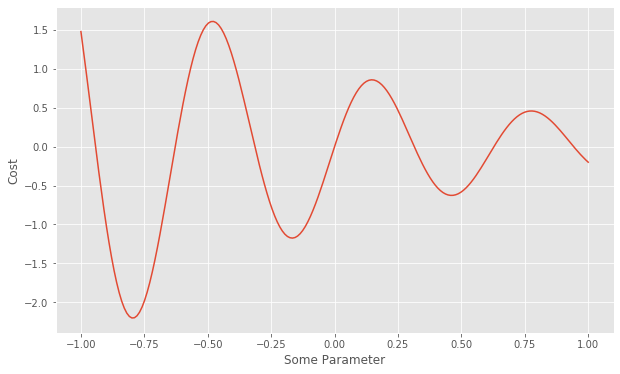

In [2]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca()
x = np.linspace(-1, 1, 200)
hz = 10
cost = np.sin(hz*x)*np.exp(-x)
ax.plot(x, cost)
ax.set_ylabel('Cost')
ax.set_xlabel('Some Parameter')

We'll never really ever be able to see our entire cost function like this.  If we were able to, we'd know exactly what parameter we should use.  So we're just imagining that as any parameters in our network change, this is how cost would change.  Since we know the value of the cost everywhere, we can easily describe the gradient using `np.diff`, which will just measure the difference between every value.  That's a good approximation of the gradient for this illustration at least.

In [3]:
gradient = np.diff(cost)

If we follow the negative gradient of this function given some randomly intialized parameter and a learning rate:

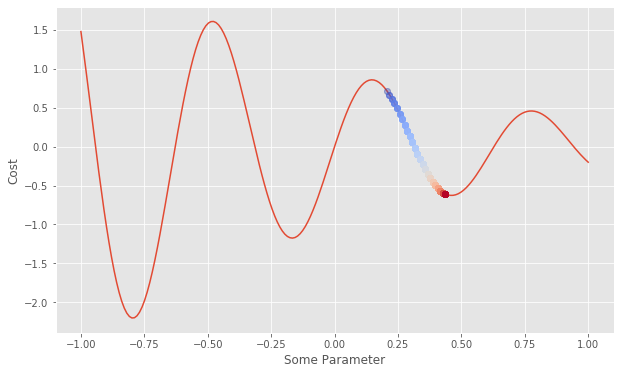

In [4]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca()
x = np.linspace(-1, 1, 200)
hz = 10
cost = np.sin(hz*x)*np.exp(-x)
ax.plot(x, cost)
ax.set_ylabel('Cost')
ax.set_xlabel('Some Parameter')
n_iterations = 500
cmap = plt.get_cmap('coolwarm')
c_norm = colors.Normalize(vmin=0, vmax=n_iterations)
scalar_map = cmx.ScalarMappable(norm=c_norm, cmap=cmap)
init_p = 120#np.random.randint(len(x)*0.2, len(x)*0.8)
learning_rate = 1.0
for iter_i in range(n_iterations):
    init_p -= learning_rate * gradient[int(init_p)]
    ax.plot(x[int(init_p)], cost[int(init_p)], 'ro', alpha=(iter_i + 1) / n_iterations, color=scalar_map.to_rgba(iter_i))

What this would mean is depending on where our random initialization of weights began, our final cost might end up being somewhere around -0.5.  This is a local minima.  It is, based on its surroundings, a minima.  But it is not the global minima.  In fact there are a few other possible places the network could have ended up, if our initialization led us to another point first, meaning our final cost would have been different.

This illustration is just for a single parameter... but our networks will often have millions of parameters... I'll illustrate the same idea with just two parameters to give you a sense of how quickly the problem becomes very difficult.

Text(0.5, 0, 'Cost')

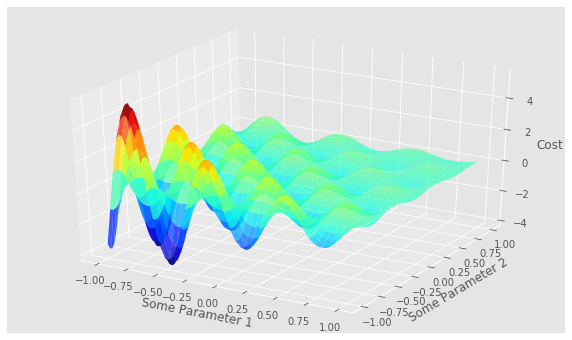

In [5]:
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
x, y = np.mgrid[-1:1:0.02, -1:1:0.02]
X, Y, Z = x, y, np.sin(hz*x)*np.exp(-x)*np.cos(hz*y)*np.exp(-y)
ax.plot_surface(X, Y, Z, rstride=2, cstride=2, alpha=0.75, cmap='jet', shade=False)
ax.set_xlabel('Some Parameter 1')
ax.set_ylabel('Some Parameter 2')
ax.set_zlabel('Cost')
# ax.axis('off')

It turns out that in practice, as the number of your parameters grows, say to a million, then finding a local minima will more often than not turn out to be very good minima.  That's good news for deep networks as we'll often work with that many parameters.

<a name="learning-rate"></a>
## Learning Rate

Another aspect of learning what our parameters should be, is how far along the gradient we should move our parameters?  That is also known as `learning_rate`.  Let's see what happens for different values of our learning rate:

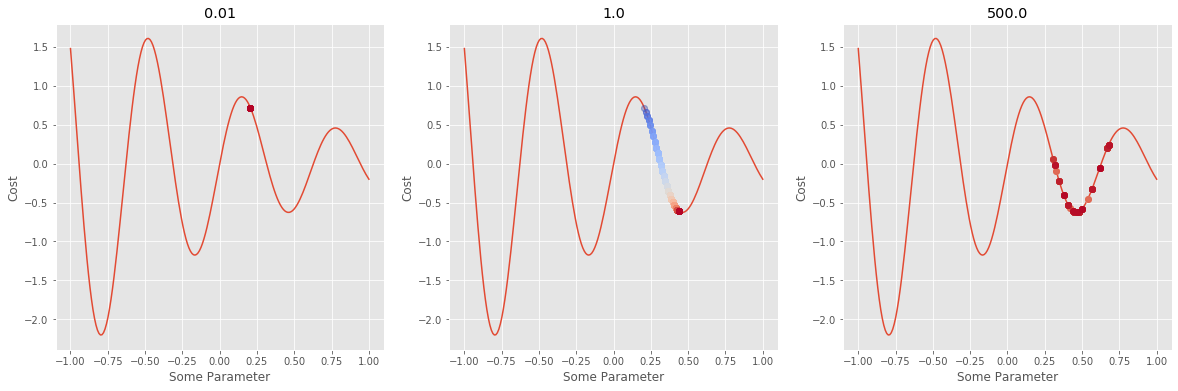

In [6]:
fig, axs = plt.subplots(1, 3, figsize=(20, 6))
for rate_i, learning_rate in enumerate([0.01, 1.0, 500.0]):
    ax = axs[rate_i]
    x = np.linspace(-1, 1, 200)
    hz = 10
    cost = np.sin(hz*x)*np.exp(-x)
    ax.plot(x, cost)
    ax.set_ylabel('Cost')
    ax.set_xlabel('Some Parameter')
    ax.set_title(str(learning_rate))
    n_iterations = 500
    cmap = plt.get_cmap('coolwarm')
    c_norm = colors.Normalize(vmin=0, vmax=n_iterations)
    scalar_map = cmx.ScalarMappable(norm=c_norm, cmap=cmap)
    init_p = 120#np.random.randint(len(x)*0.2, len(x)*0.8)
    for iter_i in range(n_iterations):
        init_p -= learning_rate * gradient[int(init_p)]
        ax.plot(x[int(init_p)], cost[int(init_p)], 'ro', alpha=(iter_i + 1) / n_iterations, color=scalar_map.to_rgba(iter_i))

In the first case, our learning rate was way too small.  It looks like we didn't manage to get any better cost than where we started!  In the second case, just right.  In the third case, our learning rate was too large.  Meaning, we overshot our minima, and moved past it.  So our cost has the effect of going up and down, instead of just going down like in the second case.

We'll learn more tricks for changing this landscape to be a bit more concave, reducing the number of local minima by regularizing the landscape through many different extensions to this same basic idea of following the negative slope of our gradient.  Before we can get into them we'll need to learn how to create a neural network.

<a name="creating-a-neural-network"></a>
# Creating a Neural Network

Let's try a simple example network.  We're going try to find a mapping of an input `X` to an output `y`, just like in our example of mapping an input image to either a 0 or 1.

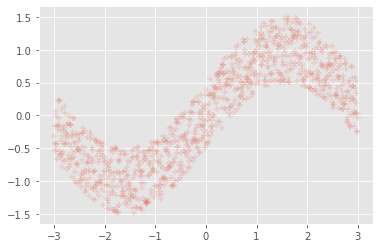

In [7]:
# Let's create some toy data

# We are going to say that we have seen 1000 values of some underlying representation that we aim to discover
n_observations = 1000

# Instead of having an image as our input, we're going to have values from -3 to 3.  This is going to be the input to our network.
xs = np.linspace(-3, 3, n_observations)

# From this input, we're going to teach our network to represent a function that looks like a sine wave.  To make it difficult, we are going to create a noisy representation of a sine wave by adding uniform noise.  So our true representation is a sine wave, but we are going to make it difficult by adding some noise to the function, and try to have our algorithm discover the underlying cause of the data, which is the sine wave without any noise.
ys = np.sin(xs) + np.random.uniform(-0.5, 0.5, n_observations)
plt.scatter(xs, ys, alpha=0.15, marker='+')

So now we can see that there is a sine wave looking thing but it's really noisy.  We want to train a network to say, given any value on the $x$ axis, tell me what the value should be on the $y$ axis.  That is the fundamental idea of regression.  Predicting some continuous output value given some continuous input value.

<a name="defining-cost-1"></a>
## Defining Cost

We're going to use tensorflow to train our first network:

In [8]:
# variables which we need to fill in when we are ready to compute the graph.
# We'll pass in the values of the x-axis to a placeholder called X.
X = tf.placeholder(tf.float32, name='X')

# And we'll also specify what the y values should be using another placeholder, y.
Y = tf.placeholder(tf.float32, name='Y')

Now for parameters of our network.  We're going to transform our x values, just like we did with an image and filtering it.  In order to do that, we're going to multiply the value of x by some unknown value.  Pretty simple.  So what that lets us do is scale the value coming in.  We'll also allow for a simple shift by adding another number.  That lets us move the range of values to any new position.

But we need an initial value for our parameters.  For that, we're going to use values close to 0 using a gaussian function:

(array([  2.,   5.,  22.,  90., 196., 256., 232., 127.,  57.,  13.]),
 array([-3.934639  , -3.252778  , -2.5709174 , -1.8890564 , -1.2071956 ,
        -0.52533484,  0.156526  ,  0.83838683,  1.5202477 ,  2.2021084 ,
         2.8839693 ], dtype=float32),
 <a list of 10 Patch objects>)

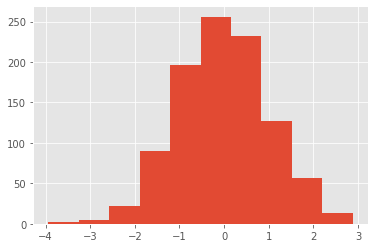

In [9]:
sess = tf.InteractiveSession()
n = tf.random_normal([1000]).eval()
plt.hist(n)

In order to do that, we can use the tensorflow `random_normal` function.  If we ask for 1000 values and then plot a histogram of the values, we can see that the values are centered around 0 and are mostly between -3 and 3.  For neural networks, we will usually want the values to start off much closer to 0.  To do that, we can control the standard deviation like so:

(array([ 12.,  35.,  84., 157., 208., 224., 154.,  91.,  29.,   6.]),
 array([-0.28713718, -0.22891472, -0.17069228, -0.11246982, -0.05424737,
         0.00397508,  0.06219753,  0.12041998,  0.17864244,  0.23686488,
         0.29508734], dtype=float32),
 <a list of 10 Patch objects>)

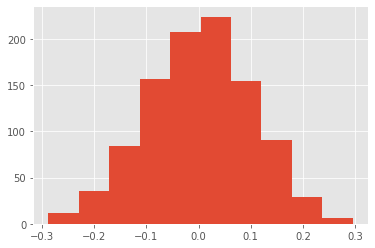

In [10]:
n = tf.random_normal([1000], stddev=0.1).eval()
plt.hist(n)

In [12]:
# To create the variables, we'll use tf.Variable, which unlike a placeholder, does not require us to define the value at the start of a run/eval.  It does need an initial value, which we'll give right now using the function tf.random_normal.  We could also pass an initializer, which is simply a function which will call the same function.  We'll see how that works a bit later.  In any case, the random_normal function just says, give me a random value from the "normal" curve.  We pass that value to a tf.Variable which creates a tensor object.
W = tf.Variable(tf.random_normal([1], dtype=tf.float32, stddev=0.1), name='weight')

# For bias variables, we usually start with a constant value of 0.
B = tf.Variable(tf.constant([0], dtype=tf.float32), name='bias')

# Now we can scale our input placeholder by W, and add our bias, b.
Y_pred = X * W + B

We're going to use gradient descent to learn what the best value of `W` and `b` is.  In order to do that, we need to know how to measure what the `best` is.  Let's think about that for a moment.  What is it we're trying to do?  We're trying to transform a value coming into the network, `x`, which ranges from values of -3 to 3, to match a known value, `Y`, which should be a sine wave which ranges from -1 to 1.  So any value into the network should make it seem like the network *represents* a sine wave.  Well we know what a sine wave should be.  We can just use python to calculate it for us.  We just need a function that measures distance:

In [13]:
# this function will measure the absolute distance, also known as the l1-norm
def distance(p1, p2):
    return tf.abs(p1 - p2)

In [14]:
# and now we can take the output of our network and our known target value
# and ask for the distance between them
cost = distance(Y_pred, tf.sin(X))

This function is just saying, give me the distance from the predicted value to the assumed underlying sine wave value.  But let's say this was some natural occuring data in the world.  Or a more complex function, like an image of oranges or apples.  We don't know what the function is that determines whether we perceive an image as an apple or orange.

In [14]:
# cost = distance(Y_pred, ?)

But we do have a limited set of data that says what a given input *should* output.  That means we can still learn what the function might be based on the data.

So instead of our previous cost function, we'd have:

In [15]:
cost = distance(Y_pred, Y)

where `Y` is the *true* Y value.

Now it doesn't matter what the function is.  Our cost will measure the difference to the value we have for the input, and try to find the underlying function.  Lastly, we need to sum over every possible observation our network is fed as input.  That's because we don't give our network 1 `x` value at a time, but generally will give it 50-100 or more examples at a time.

In [16]:
cost = tf.reduce_mean(distance(Y_pred, Y))

<a name="training-parameters"></a>
## Training Parameters

Let's see how we can learn the parameters of this simple network using a tensorflow optimizer.

In [17]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

<TODO: Describe Train/Test sets, use test set to visualize rest of number line>

We tell the optimizer to minimize our `cost` variable which measures the distance between the prediction and actual `Y` value.  The optimizer knows how to calculate the gradient and follow it in the negative direction to find the smallest value, and handles updating all variables!

We now just need to iteratively run the optimizer, just like we would run/eval any other part of our tensorflow graph.

0.62750727
0.50291777
0.44874457
0.42662194
0.41678455
0.41339162
0.4117288
0.41096857
0.41057494
0.41037747
0.41031802
0.41028866
0.41027078


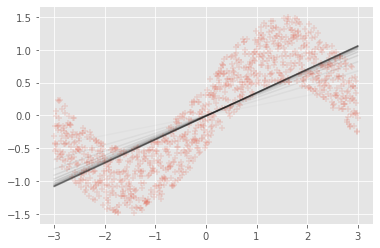

In [18]:
# We create a session to use the graph
n_iterations = 500

# Plot the true data distribution
fig, ax = plt.subplots(1, 1)
ax.scatter(xs, ys, alpha=0.15, marker='+')
with tf.Session() as sess:
    # Here we tell tensorflow that we want to initialize all
    # the variables in the graph so we can use them
    # This will set `W` and `b` to their initial random normal value.
    sess.run(tf.global_variables_initializer())

    # We now run a loop over epochs
    prev_training_cost = 0.0
    for it_i in range(n_iterations):
        sess.run(optimizer, feed_dict={X: xs, Y: ys})
        training_cost = sess.run(cost, feed_dict={X: xs, Y: ys})

        # every 10 iterations
        if it_i % 10 == 0:
            # let's plot the x versus the predicted y
            ys_pred = Y_pred.eval(feed_dict={X: xs}, session=sess)

            # We'll draw points as a scatter plot just like before
            # Except we'll also scale the alpha value so that it gets
            # darker as the iterations get closer to the end
            ax.plot(xs, ys_pred, 'k', alpha=it_i / n_iterations)
            fig.show()
            plt.draw()

            # And let's print our training cost: mean of absolute differences
            print(training_cost)

        # Allow the training to quit if we've reached a minimum
        if np.abs(prev_training_cost - training_cost) < 0.000001:
            break

        # Keep track of the training cost
        prev_training_cost = training_cost

After running the code, we should see our original noisy data.  We call that the training data since it is training the network.  And we see the output of the network as a solid black line.

Now you might be thinking, wait, that looks like nothing like a sine wave... I mean it has got the general trend of the line I guess.  But it doesn't curve at all!  We're going to get into why that is in a moment.

But first, we're going to have to learn a bit more about the different between training and testing networks.

<a name="training-vs-testing"></a>
## Training vs. Testing

<TODO:>

<a name="stochastic-and-mini-batch-gradient-descent"></a>
## Stochastic and Mini Batch Gradient Descent

Now remember when I said our cost manifold would have many local minima, and that we'd learn some tricks to help us find the best one?  Well now we're ready to talk about two ways of helping with that.  One is using what are called mini-batches.  This is useful for a number of reasons.  First, it is generally impractical to look at an entire dataset.  You might have millions of images which you couldn't ever try loading all at once into a network.  Instead you would look at some random subset of them.  Second, we avoid trying to generalize our entire dataset, allowing us to navigate through more fine grained terrain.  In order to use mini batches, we simply iterate through our entire dataset, `batch_size` at a time:

In [19]:
idxs = np.arange(100)
batch_size = 10
n_batches = len(idxs) // batch_size
for batch_i in range(n_batches):
    print(idxs[batch_i * batch_size : (batch_i + 1) * batch_size])

[0 1 2 3 4 5 6 7 8 9]
[10 11 12 13 14 15 16 17 18 19]
[20 21 22 23 24 25 26 27 28 29]
[30 31 32 33 34 35 36 37 38 39]
[40 41 42 43 44 45 46 47 48 49]
[50 51 52 53 54 55 56 57 58 59]
[60 61 62 63 64 65 66 67 68 69]
[70 71 72 73 74 75 76 77 78 79]
[80 81 82 83 84 85 86 87 88 89]
[90 91 92 93 94 95 96 97 98 99]


It turns out that this is not the best idea, because we're always looking at the same order of our dataset.  Neural networks love order.  They will pick up on any order you give it and use that to its advantage.  But the order of the data is entirely irrelevant to our problem.  In some cases, it may turn out to be exactly what we want to do.  For instance, if we want to learn about how something changes over time, like audio, or letters or words in a sequence which form sentences.  Then we will have to make sure we're sending data in a certain order.  But for now, we really want to avoid using any order.

So we'll have to randomly permute the indexes of our dataset like so:

In [20]:
rand_idxs = np.random.permutation(idxs)
batch_size = 10
n_batches = len(rand_idxs) // batch_size
print('# of batches:', n_batches)
for batch_i in range(n_batches):
    print(rand_idxs[batch_i * batch_size : (batch_i + 1) * batch_size])

# of batches: 10
[ 6 94 10 90 79 61 43 86 19 83]
[26  9 85 77 95 39 69 78 70 17]
[99 24 47 57 64 62 31 52 55 60]
[63 92 88 11 66  8 40 67 73 65]
[84 82 68  1 71 28 23 37 48 80]
[87 45 36 14 72 44 15 16 76  0]
[42 56 33 46 27 97  4  7 12 91]
[ 2 49 18 29 89 98 41 30 54  5]
[96 22  3 75 21 25 81 51 32 93]
[59 35 74 53 13 50 58 34 20 38]


What we've done above is look at a range of 100 possible indexes by chunking them into `batch_size` at a time.  But we've also randomized the order we've looked at them so that we aren't prioritizing learning one part of a dataset over another.

We can implement this into our previous code like so:

0.61210513
0.4957282
0.44601354
0.4252663
0.4163073
0.41318527
0.4116266
0.4109145
0.4105492
0.41037095
0.41031542
0.41028637
0.4102691
0.41025996
0.41025627
0.4102558
0.41025537
0.41025493
0.41025448
0.410254
0.4102536
0.41025314
0.41025266
0.4102522
0.41025177
0.41025135
0.4102509
0.41025048
0.41025004
0.41024968
0.4102496
0.4102495
0.41024944
0.41024935
0.41024935
0.41024932
0.41024935
0.4102493
0.41024932
0.41024926
0.4102493
0.41024926
0.41024926
0.41024926
0.41024926
0.41024923
0.41024923
0.41024923
0.41024917
0.41024914


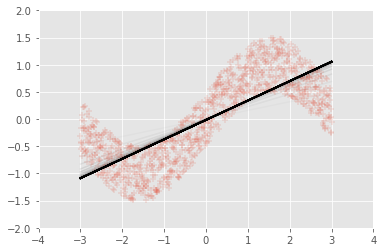

In [21]:
batch_size = 1000
fig, ax = plt.subplots(1, 1)
ax.scatter(xs, ys, alpha=0.15, marker='+')
ax.set_xlim([-4, 4])
ax.set_ylim([-2, 2])
with tf.Session() as sess:
    # Here we tell tensorflow that we want to initialize all
    # the variables in the graph so we can use them
    # If we had used tf.random_normal_initializer or tf.constant_intitializer,
    # then this would have set `W` and `b` to their initial values.
    sess.run(tf.global_variables_initializer())

    # We now run a loop over epochs
    prev_training_cost = 0.0
    for it_i in range(n_iterations):
        idxs = np.random.permutation(range(len(xs)))
        n_batches = len(idxs) // batch_size
        for batch_i in range(n_batches):
            idxs_i = idxs[batch_i * batch_size: (batch_i + 1) * batch_size]
            sess.run(optimizer, feed_dict={X: xs[idxs_i], Y: ys[idxs_i]})

        training_cost = sess.run(cost, feed_dict={X: xs, Y: ys})

        if it_i % 10 == 0:
            ys_pred = Y_pred.eval(feed_dict={X: xs}, session=sess)
            ax.plot(xs, ys_pred, 'k', alpha=it_i / n_iterations)
            print(training_cost)
fig.show()
plt.draw()

The resulting process is also know as Mini-Batch Gradient Descent, since we are taking smaller batches of our data and performing gradient descent.  Further, it is Stochastic, meaning the order of the data presented is randomized, and is also commonly referred to as Stochastic Gradient Descent.  When the two ideas are combined, we have the best of both worlds: the mini batch part which allows us to get more stable updates; and the stochastic part which allows us to move to different parts of our cost's manifold entirely.  I'll just use Gradient Descent as we'll always want it to be in batches, and to be the stochastic kind.

Let's stick all of the code necessary for training into a function so we don't have to type it out again:

In [22]:
def train(X, Y, Y_pred, n_iterations=100, batch_size=200, learning_rate=0.02):
    cost = tf.reduce_mean(distance(Y_pred, Y))
    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
    fig, ax = plt.subplots(1, 1)
    ax.scatter(xs, ys, alpha=0.15, marker='+')
    ax.set_xlim([-4, 4])
    ax.set_ylim([-2, 2])
    with tf.Session() as sess:
        # Here we tell tensorflow that we want to initialize all
        # the variables in the graph so we can use them
        # This will set W and b to their initial random normal value.
        sess.run(tf.global_variables_initializer())

        # We now run a loop over epochs
        prev_training_cost = 0.0
        for it_i in range(n_iterations):
            idxs = np.random.permutation(range(len(xs)))
            n_batches = len(idxs) // batch_size
            for batch_i in range(n_batches):
                idxs_i = idxs[batch_i * batch_size: (batch_i + 1) * batch_size]
                sess.run(optimizer, feed_dict={X: xs[idxs_i], Y: ys[idxs_i]})

            training_cost = sess.run(cost, feed_dict={X: xs, Y: ys})

            if it_i % 10 == 0:
                ys_pred = Y_pred.eval(feed_dict={X: xs}, session=sess)
                ax.plot(xs, ys_pred, 'k', alpha=it_i / n_iterations)
                print(training_cost)
    fig.show()
    plt.draw()

To get closer to a sine wave, we're going to have to be able to do more than simply scale our input with a multiplication!  What if we had a lot more parameters?  What if we have 10 different multiplications of the input?  What does your intuition tell you?  How are 10 more multiplications combined?  1000?  A million?

<QUIZ>

Would we be able to find a good representation then?  Let's try and see how we might do that:

3.036809
2.4587207
2.7757852
3.2948008
2.3955708
2.6589575
3.0311842
2.64114
2.8179598
2.6162765


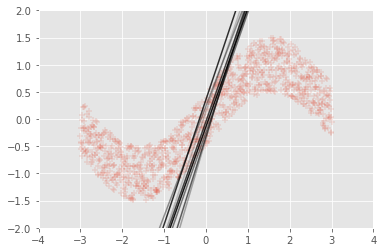

In [23]:
# We're going to multiply our input by 100 values, creating an "inner layer"
# of 100 neurons.
n_neurons = 100
W = tf.Variable(tf.random_normal([1, n_neurons], stddev=0.1))

# and allow for n_neurons additions on each of those neurons
b = tf.Variable(tf.constant(0, dtype=tf.float32, shape=[n_neurons]))

# Instead of multiplying directly, we use tf.matmul to perform a
# matrix multiplication
h = tf.matmul(tf.expand_dims(X, 1), W) + b

# Create the operation to add every neuron's output
Y_pred = tf.reduce_sum(h, 1)

# Retrain with our new Y_pred
train(X, Y, Y_pred)

First, the training takes a lot longer!  That's because our network is much larger.  By adding 100 neurons, we've added 100 more multiplications, and 100 more additions for every observation.  Since we have 10000 observations, that's $(100 + 100) * 10000$ more computations just for computing the output, or 100 million more computations.  But that's not all.  We also need to compute the gradients of every parameter!  Having all of these extra parameters makes it much harder to find the best solution.  So as our network expands, the amount of memory and computation will grow very fast, and training becomes more difficult.

Despite increasing everything about our network, looking at the cost, we're not doing much better!  Why is that?  Well, we've added a lot more multiplications.  But it hasn't changed the fact that our function is still just a linear function.  Multiplying a millions times wouldn't help but instead just make it harder to find the same solution we found with far less parameters.  But also, the cost is going up and down, instead of just down.  That's a good sign that we should probably reduce the learning rate.

<a name="inputs-representation"></a>
## Input's Representation

In order to get more complexity, we could consider changing our input's representation.  For instance, if you are working with sound, it may not be the best idea to think about representing the sound as a signal, and instead you might want to explore using something like the discrete fourier transform.  Or if you're working with text, there may be other representations that will allow you to learn more useful features of your data such as word histograms.  There may be other possibilities depending on your application.

<a name="over-vs-underfitting"></a>
## Over vs. Underfitting

One technique for representing curved data like a sine wave is to consider the different polynomials of your input.

0.65232354
0.42539337
0.4107245
0.4102672
0.41025066
0.41025218
0.410252
0.41025048
0.41025096
0.4102514


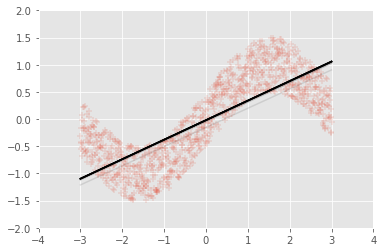

In [24]:
# Instead of a single factor and a bias, we'll create a polynomial function
# of different degrees.  We will then learn the influence that each
# degree of the input (X^0, X^1, X^2, ...) has on the final output (Y).
Y_pred = tf.Variable(tf.random_normal([1]), name='bias')
for pow_i in range(1, 2):
    W = tf.Variable(
        tf.random_normal([1], stddev=0.1), name='weight_%d' % pow_i)
    Y_pred = tf.add(tf.multiply(tf.pow(X, pow_i), W), Y_pred)

# And then we'll retrain with our new Y_pred
train(X, Y, Y_pred)

If we use the 0th and 1st expansion, that is $x^0$, which just equals 1, and $x^1$.  So $x * W_1$.  That's exactly the same as what we've just done.  It starts to get interesting once we add more powers:

0.58584565
0.3551505
0.4665298
0.53547084
0.4319295
0.6273758
0.45195848
0.56335455
0.62198627
0.6982346


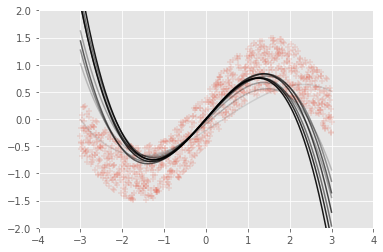

In [25]:
# Instead of a single factor and a bias, we'll create a polynomial function
# of different degrees.  We will then learn the influence that each
# degree of the input (X^0, X^1, X^2, ...) has on the final output (Y).
Y_pred = tf.Variable(tf.random_normal([1]), name='bias')
for pow_i in range(1, 4):
    W = tf.Variable(
        tf.random_normal([1], stddev=0.1), name='weight_%d' % pow_i)
    Y_pred = tf.add(tf.multiply(tf.pow(X, pow_i), W), Y_pred)

# And then we'll retrain with our new Y_pred
train(X, Y, Y_pred)

But we really don't want to add *too many* powers.  If we add just 1 more power:

1.3042591
3.2311144
3.508603
3.1928744
1.0760537
4.034003
1.848915
4.3914175
1.4250854
1.6332793


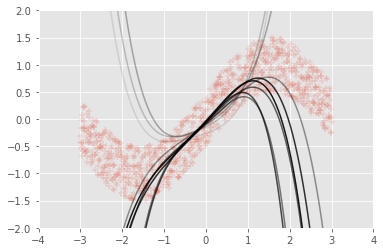

In [26]:
# Instead of a single factor and a bias, we'll create a polynomial function
# of different degrees.  We will then learn the influence that each
# degree of the input (X^0, X^1, X^2, ...) has on the final output (Y).
Y_pred = tf.Variable(tf.random_normal([1]), name='bias')
for pow_i in range(1, 5):
    W = tf.Variable(
        tf.random_normal([1], stddev=0.1), name='weight_%d' % pow_i)
    Y_pred = tf.add(tf.multiply(tf.pow(X, pow_i), W), Y_pred)

# And then we'll retrain with our new Y_pred
train(X, Y, Y_pred)

The whole thing is completely off.  In general, a polynomial expansion is hardly ever useful as it requires us to know what the underlying function is, meaning, what order polynomial is it?

<a name="introducing-nonlinearities--activation-function"></a>
## Introducing Nonlinearities / Activation Function

How else can we get our line to express the curves in our data?  What we'll explore instead is what happens when you add a non-linearity, which you might also hear be called an activation function.  That is a really essential ingredient to any deep network.  Practically every complex deep learning algorithm performs a series of linear, followed by nonlinear operations.  By stacking sets of these, the complexity and power of expression grows far greater than any linear equation could.

We'll typically make use of one of three non-linearities for the rest of this course:

/home/cci-research/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/client/session.py:1750: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


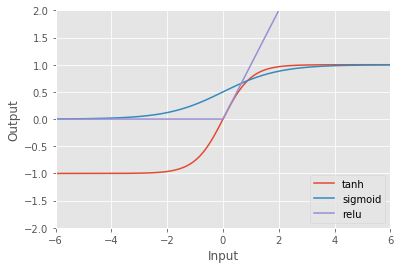

In [27]:
sess = tf.InteractiveSession()
x = np.linspace(-6,6,1000)
plt.plot(x, tf.nn.tanh(x).eval(), label='tanh')
plt.plot(x, tf.nn.sigmoid(x).eval(), label='sigmoid')
plt.plot(x, tf.nn.relu(x).eval(), label='relu')
plt.legend(loc='lower right')
plt.xlim([-6, 6])
plt.ylim([-2, 2])
plt.xlabel('Input')
plt.ylabel('Output')
plt.grid('on')

What each of these curves demonstrates is how instead of just multiplying an input by a number, creating another line, we *non*-linearly multiply the input value.  That just means we will multiply our input by a different value depending on what the input value is.  This allows us to express very complex ideas.  If we do this enough times, we can express anything.  Let's see how we can do this

0.30958542
0.27766666
0.27070263
0.2683724
0.26741698
0.26689714
0.2665966
0.2662759
0.26605982
0.265849


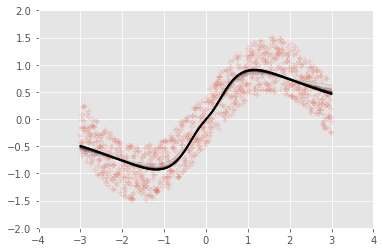

In [28]:
# We're going to multiply our input by 10 values, creating an "inner layer"
# of n_neurons neurons.
n_neurons = 10
W = tf.Variable(tf.random_normal([1, n_neurons]), name='W')

# and allow for n_neurons additions on each of those neurons
b = tf.Variable(tf.constant(0, dtype=tf.float32, shape=[n_neurons]), name='b')

# Instead of just multiplying, we'll put our n_neuron multiplications through a non-linearity, the tanh function.
h = tf.nn.tanh(tf.matmul(tf.expand_dims(X, 1), W) + b, name='h')

Y_pred = tf.reduce_sum(h, 1)

# And retrain w/ our new Y_pred
train(X, Y, Y_pred)

<TODO: Graphic of fully connected network, matrix>

It turns out that multiplying our input by a matrix, adding a bias, and then applying a non-linearity is something we'll need to do a lot.  It's often called a fully-connected network, since everything is connected to everything else, meaning every neuron is multiplied by every single input value.  This is also sometimes called a linear layer, since we are linearly combining the values of the input to create the resulting neuron.

You might have seen this depicted like so:


<a name="going-deeper"></a>
## Going Deeper

Let's write a simply function for creating the same type of network as above:

In [29]:
def linear(X, n_input, n_output, activation=None):
    W = tf.Variable(tf.random_normal([n_input, n_output], stddev=0.1), name='W')
    b = tf.Variable(
        tf.constant(0, dtype=tf.float32, shape=[n_output]), name='b')
    h = tf.nn.tanh(tf.matmul(X, W) + b, name='h')
    return h

Let's now take a look at what the tensorflow graph looks like when we create this type of connection:

In [30]:
# first clear the graph
from tensorflow.python.framework import ops
ops.reset_default_graph()

# let's get the current graph
g = tf.get_default_graph()

# See the names of any operations in the graph
[op.name for op in tf.get_default_graph().get_operations()]

# let's create a new network
X = tf.placeholder(tf.float32, name='X')
h = linear(X, 2, 10)

# See the names of any operations in the graph
[op.name for op in tf.get_default_graph().get_operations()]

['X',
 'random_normal/shape',
 'random_normal/mean',
 'random_normal/stddev',
 'random_normal/RandomStandardNormal',
 'random_normal/mul',
 'random_normal',
 'W',
 'W/Assign',
 'W/read',
 'Const',
 'b',
 'b/Assign',
 'b/read',
 'MatMul',
 'add',
 'h']

The names of the variables in this network aren't very helpful.  We can actually do a much better job here by creating our variables within *scopes*:

In [31]:
def linear(X, n_input, n_output, activation=None, scope=None):
    with tf.variable_scope(scope or "linear"):
        W = tf.get_variable(
            name='W',
            shape=[n_input, n_output],
            initializer=tf.random_normal_initializer(mean=0.0, stddev=0.1))
        b = tf.get_variable(
            name='b',
            shape=[n_output],
            initializer=tf.constant_initializer())
        h = tf.matmul(X, W) + b
        if activation is not None:
            h = activation(h)
        return h

We've also moved from using a single random value, to using an initializer.  This initializer will create a new random value every time we call `sess.run(tf.global_variables_initializer())`.  We also pass some more sensible values for the initial mean and standard deviation.

Now let's look at the graph:

In [32]:
# first clear the graph
from tensorflow.python.framework import ops
ops.reset_default_graph()

# let's get the current graph
g = tf.get_default_graph()

# See the names of any operations in the graph
[op.name for op in tf.get_default_graph().get_operations()]

# let's create a new network
X = tf.placeholder(tf.float32, name='X')
h = linear(X, 2, 10, scope='layer1')

# See the names of any operations in the graph
[op.name for op in tf.get_default_graph().get_operations()]

['X',
 'layer1/W/Initializer/random_normal/shape',
 'layer1/W/Initializer/random_normal/mean',
 'layer1/W/Initializer/random_normal/stddev',
 'layer1/W/Initializer/random_normal/RandomStandardNormal',
 'layer1/W/Initializer/random_normal/mul',
 'layer1/W/Initializer/random_normal',
 'layer1/W',
 'layer1/W/Assign',
 'layer1/W/read',
 'layer1/b/Initializer/Const',
 'layer1/b',
 'layer1/b/Assign',
 'layer1/b/read',
 'layer1/MatMul',
 'layer1/add']

We can see that everything that is part of creating a linear connection is under the scoped tag we have given it.

If we create multiple linear connections, this becomes really useful for understanding what's in our graph:

In [33]:
# Let's connect the output of our last network to another one!

# Wow we just made a Deep Network!  Let's make it deeper!
h2 = linear(h, 10, 10, scope='layer2')

# Again!
h3 = linear(h2, 10, 3, scope='layer3')

# Now when we look at the names of the operations in the graph, we can directly see which operations belong to each layer!
[op.name for op in tf.get_default_graph().get_operations()]

['X',
 'layer1/W/Initializer/random_normal/shape',
 'layer1/W/Initializer/random_normal/mean',
 'layer1/W/Initializer/random_normal/stddev',
 'layer1/W/Initializer/random_normal/RandomStandardNormal',
 'layer1/W/Initializer/random_normal/mul',
 'layer1/W/Initializer/random_normal',
 'layer1/W',
 'layer1/W/Assign',
 'layer1/W/read',
 'layer1/b/Initializer/Const',
 'layer1/b',
 'layer1/b/Assign',
 'layer1/b/read',
 'layer1/MatMul',
 'layer1/add',
 'layer2/W/Initializer/random_normal/shape',
 'layer2/W/Initializer/random_normal/mean',
 'layer2/W/Initializer/random_normal/stddev',
 'layer2/W/Initializer/random_normal/RandomStandardNormal',
 'layer2/W/Initializer/random_normal/mul',
 'layer2/W/Initializer/random_normal',
 'layer2/W',
 'layer2/W/Assign',
 'layer2/W/read',
 'layer2/b/Initializer/Const',
 'layer2/b',
 'layer2/b/Assign',
 'layer2/b/read',
 'layer2/MatMul',
 'layer2/add',
 'layer3/W/Initializer/random_normal/shape',
 'layer3/W/Initializer/random_normal/mean',
 'layer3/W/Initiali

<TODO: Also, we can visualize our network using Tensorboard...>

<a name="image-inpainting"></a>
# Image Inpainting

<a name="description"></a>
## Description

Now we've got most of the tools we'll need to perform much more complicated tasks.  We'll first explore a fun application: painting an image.  This network is just meant to demonstrate how the previous networks we've learned can be scaled to more complicated tasks without much modification.

We'll follow an example that Andrej Karpathy has done in his online demonstration of "image inpainting".  Let's first get an image that we'll try to teach a neural network to paint.

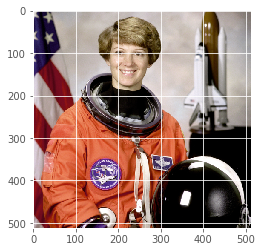

In [46]:
from skimage.data import astronaut
from PIL import Image
from numpy import asarray 


#from scipy.misc import imresize
#img = imresize(astronaut(), (64, 64))

img_temp = Image.fromarray(astronaut())
img_temp.resize(size=(64, 64))
img = asarray(img_temp)
plt.imshow(img)

Instead of using a network to go from some x position to the value of a sine wave, what we're going to do instead teach a network to go from the location on an image frame to a particular color.  So given any position in an image, the network will need to learn what color to paint.  Despite the seeming complexity of this task, it is remarkably similar to what we've just done.  Let's take a look.

In [49]:
# We'll first collect all the positions in the image in our list, xs
xs = []

# And the corresponding colors for each of these positions
ys = []

# Now loop over the image
for row_i in range(img.shape[0]):
    for col_i in range(img.shape[1]):
        # And store the inputs
        xs.append([row_i, col_i])
        # And outputs that the network needs to learn to predict
        ys.append(img[row_i, col_i])

# we'll convert our lists to arrays
xs = np.array(xs)
ys = np.array(ys)

# Normalizing the input by the mean and standard deviation
xs = (xs - np.mean(xs)) / np.std(xs)

# and print the shapes
xs.shape, ys.shape

((262144, 2), (262144, 3))

What we're going to do is use regression to predict the value of a pixel given its (row, col) position.  So the input to our network is `X = (row, col)` value.  And the output of the network is `Y = (r, g, b)`.

We can get our original image back by reshaping the colors back into the original image shape:

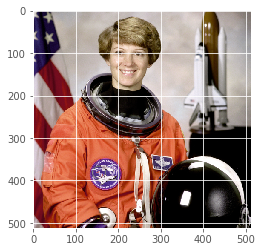

In [50]:
plt.imshow(ys.reshape(img.shape))

Remember before, we were using regression to input to our network `X = x`, and output `Y = y`.  The only thing that is changing here is the number of values in our input and output, and what they represent to us.  But Tensorflow can handle any number of values we give it, so this is actually a pretty simple modification to the network definition.  We'll stick with the convention of using the variable `X` to denote the input to the network, and `Y` to denote the output of the network.

In [51]:
X = tf.placeholder(tf.float32, shape=[None, 2], name='X')
Y = tf.placeholder(tf.float32, shape=[None, 3], name='Y')

<a name="building-the-network"></a>
## Building the Network

For our model, we'll make our first deep neural network!  Instead of having a single fully connected layer, we'll have many layers.  We'll make use of a for loop to simplify the creation of the network. The network will look like:

<TODO: wacom/motion-graphic>

In [52]:
n_neurons = [2, 64, 64, 64, 64, 64, 64, 3]

current_input = X
for layer_i in range(1, len(n_neurons)):
    current_input = linear(
        X=current_input,
        n_input=n_neurons[layer_i - 1],
        n_output=n_neurons[layer_i],
        activation=tf.nn.relu if (layer_i+1) < len(n_neurons) else None,
        scope='layer_' + str(layer_i))
Y_pred = current_input

The rest of this code is pretty much the same as what we've done in previous networks.  We setup our cost.  Except before, we only ever had 1 feature.  In this network, our output is 3 vaules, `r`, `g`, `b`.

<a name="training"></a>
## Training

In order to better measure the error, we'll sum the error across all 3 values.  There are many ways we could have approached this which we'll get into in later sessions.

In [53]:
cost = tf.reduce_mean(
    tf.reduce_sum(distance(Y_pred, Y), 1))

We're going to use a different type of optimizer called `AdamOptimizer` which in general will work better than the original `GradientDescentOptimizer`.  It's pretty similar, except it has some tricks to help with gradient descent.  Getting into the details of it is beyond the scope of what we have time for.  So long as you're not working with sequential data or building a recurrent network, it will probably always work better than just using GradientDescent.

In [54]:
optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)

The rest of the code is pretty much the same.  We create the optimizer exactly the same way, by giving it our cost.  And then create a session to iterate over chunks of our training data.  Every 20 iterations, we're going to draw the predicted image by evaluating the predicted image tensor, `Y_pred`, and giving it every location in the image to predict, the `xs` array.  This will return us the predicted color values for those locations.  This process will take awhile!

0 104.18813
1 91.552795
2 80.88463
3 78.33266
4 75.63975
5 71.15273
6 65.19919
7 65.97223
8 64.67403
9 61.34017
10 57.935493
11 57.004433
12 57.47062
13 53.122757
14 52.8439
15 52.944855
16 51.178913
17 50.512592
18 52.650677
19 50.84681


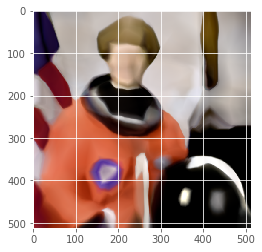

20 55.247482
21 53.352734
22 47.89743
23 48.001915
24 46.8453
25 49.061756
26 47.056038
27 46.22176
28 45.84939
29 44.821815
30 42.8685
31 45.29249
32 44.976967
33 47.92077
34 45.919662
35 42.833443
36 42.634716
37 46.427635
38 44.441025
39 42.609413


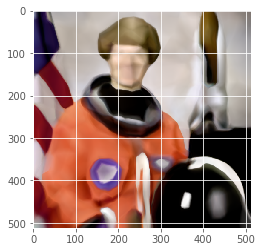

40 42.34242
41 43.272045
42 44.227135
43 40.4943
44 41.788223
45 43.58917
46 41.337776
47 41.895317
48 39.4352
49 37.08686
50 36.720497
51 39.063606
52 38.90815
53 38.596985
54 39.770557
55 37.64955
56 39.442387
57 37.726593
58 38.863873
59 37.93228


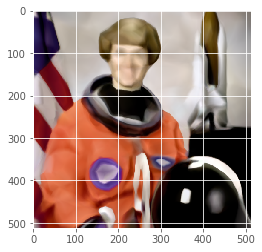

60 35.68286
61 37.83499
62 39.315887
63 37.464046
64 35.448807
65 35.706043
66 36.917336
67 35.482445
68 39.74987
69 36.56121
70 36.66491
71 36.171814
72 34.626293
73 34.935806
74 36.659325
75 35.16973
76 36.65297
77 35.426292
78 33.330406
79 32.904053


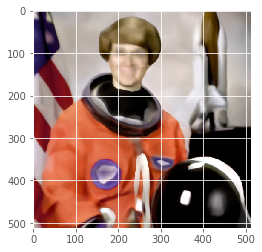

80 34.90692
81 33.533463
82 34.913895
83 36.844513
84 35.037918
85 34.0296
86 34.42325
87 34.714993
88 34.587654
89 33.251923
90 36.243595
91 33.44027
92 35.91019
93 31.99928
94 37.40976
95 34.480377
96 34.265354
97 32.240932
98 33.137917
99 31.85942


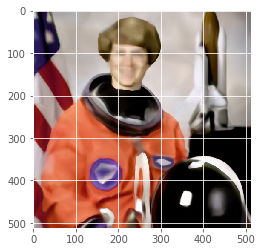

100 33.31154
101 35.23149
102 33.281868
103 33.26912
104 32.760536
105 37.50969
106 31.75996
107 31.857567
108 33.671303
109 34.237137
110 33.119774
111 32.20166
112 35.004807
113 34.561394
114 32.8631
115 32.329414
116 31.877296
117 32.62796
118 33.75319
119 31.722153


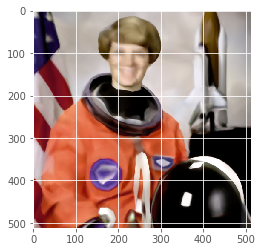

120 33.520737
121 31.302784
122 31.87265
123 32.62872
124 30.358948
125 31.791288
126 30.671017
127 30.275202
128 31.080708
129 30.792698
130 30.554474
131 32.367737
132 29.839643
133 31.006931
134 31.512518
135 29.428852
136 30.870079
137 32.3272
138 30.981903
139 30.738697


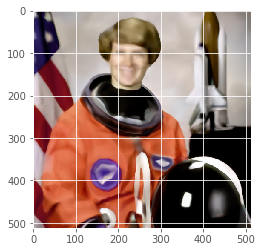

140 30.082201
141 30.957352
142 29.99215
143 30.226809
144 31.570297
145 30.15075
146 31.48422
147 30.756786
148 30.482159
149 30.392311
150 30.597137
151 29.726902
152 31.637615
153 29.484268
154 28.916233
155 30.72493
156 29.163984
157 29.435978
158 30.165262
159 31.452763


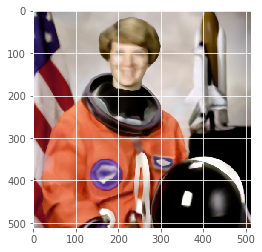

160 28.447681
161 29.603043
162 29.322319
163 30.003277
164 31.360485
165 29.985134
166 29.965471
167 31.276611
168 32.014744
169 29.869509
170 30.652855
171 29.335903
172 30.649616
173 28.942787
174 30.987984
175 31.143877
176 28.816513
177 27.999882
178 27.72904
179 28.934727


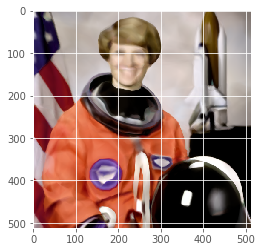

180 28.752966
181 29.237251
182 28.746948
183 28.057352
184 30.975769
185 30.146595
186 29.80573
187 29.053234
188 28.518818
189 28.00517
190 29.65973
191 31.112558
192 27.839296
193 28.18354
194 28.778189
195 28.666245
196 29.196548
197 28.322906
198 28.713387
199 29.933685


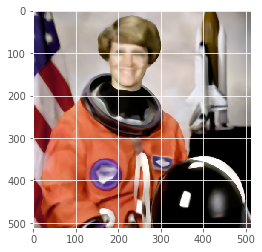

200 29.917156
201 29.35615
202 27.15711
203 27.483276
204 29.740147
205 29.991879
206 27.987328
207 28.429996
208 27.67678
209 27.509853
210 27.860544
211 29.352367
212 28.04689
213 29.12162
214 28.54964
215 28.749197
216 27.847488
217 29.513088
218 27.073853
219 27.646807


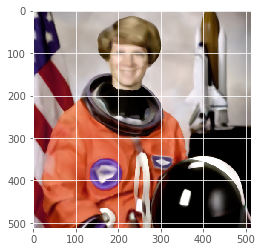

220 28.296862
221 27.53836
222 29.22483
223 27.881678
224 28.925583
225 27.763683
226 28.424469
227 27.057503
228 28.179806
229 26.934315
230 28.104668
231 29.679052
232 28.603943
233 26.951006
234 28.342377
235 28.823318
236 27.52896
237 28.519478
238 27.867134
239 28.9486


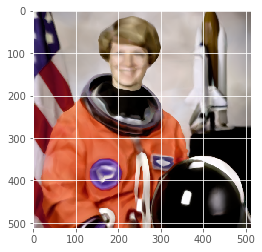

240 29.067383
241 28.237103
242 26.837963
243 27.588516
244 27.413563
245 27.578781
246 26.896595
247 28.288292
248 28.00535
249 28.815664
250 28.654362
251 27.592316
252 26.53858
253 27.071049
254 27.396368
255 28.149286
256 27.025055
257 26.627562
258 28.624603
259 27.855291


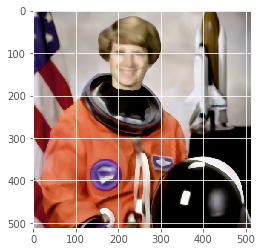

260 26.713331
261 27.629362
262 26.661295
263 27.05632
264 29.173765
265 28.587078
266 25.426807
267 27.848093
268 26.255283
269 27.552393
270 28.53856
271 27.776814
272 26.509634
273 27.235975
274 26.15382
275 26.403036
276 27.710083
277 25.756496
278 27.818233
279 28.033375


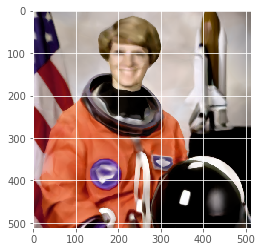

280 28.579315
281 26.590508
282 26.532848
283 26.609482
284 25.477314
285 27.068256
286 28.005045
287 27.773582
288 27.283922
289 26.169037
290 27.269972
291 26.380894
292 27.134579
293 27.400517
294 27.355354
295 27.292446
296 28.506239
297 26.14695
298 27.229652
299 25.562


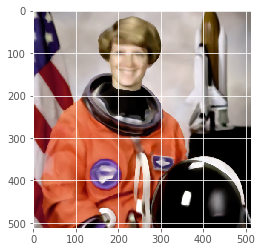

300 27.68944
301 26.060078
302 25.642288
303 26.232525
304 26.456089
305 27.340076
306 26.628862
307 26.850857
308 26.139177
309 26.869837
310 26.678677
311 26.596363
312 27.264067
313 25.600048
314 26.634144
315 26.170635
316 27.284481
317 25.991573
318 27.071594
319 26.911081


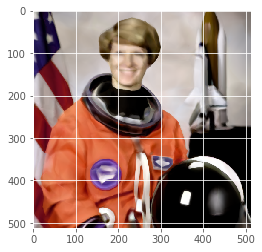

320 26.353273
321 28.06549
322 25.03627
323 26.712082
324 27.376183
325 26.261845
326 26.23629
327 26.867395
328 26.069777
329 25.651209
330 25.562727
331 25.384394
332 25.940037
333 25.8198
334 25.918821
335 25.888931
336 26.99784
337 26.730103
338 26.008163
339 26.192184


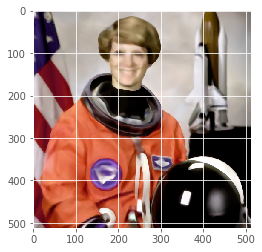

340 26.263037
341 27.913376
342 26.79193
343 25.813015
344 25.12523
345 27.383026
346 27.326557
347 26.754004
348 25.217197
349 25.786621
350 26.75943
351 25.536524
352 26.329496
353 28.665937
354 26.08396
355 25.047039
356 26.074081
357 25.069683
358 25.642479
359 26.723804


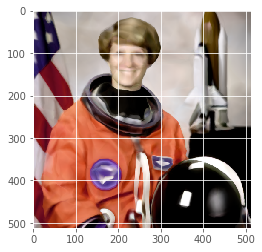

360 29.93414
361 24.999516
362 27.850233
363 26.997126
364 27.150835
365 26.161634
366 25.662607
367 26.956575
368 25.695084
369 26.17757
370 25.844048
371 26.135891
372 26.778316
373 27.617764
374 26.67083
375 25.912209
376 27.645409
377 26.478193
378 26.341637
379 26.59854


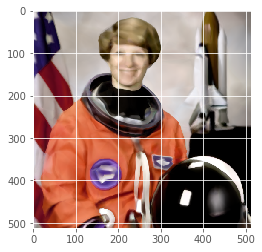

380 27.236004
381 25.53299
382 27.155993
383 26.508825
384 25.479546
385 27.071278
386 25.539965
387 25.40576
388 25.326942


In [ ]:
n_iterations = 500
batch_size = 50
with tf.Session() as sess:
    # Here we tell tensorflow that we want to initialize all
    # the variables in the graph so we can use them
    # This will set W and b to their initial random normal value.
    sess.run(tf.global_variables_initializer())

    # We now run a loop over epochs
    prev_training_cost = 0.0
    for it_i in range(n_iterations):
        idxs = np.random.permutation(range(len(xs)))
        n_batches = len(idxs) // batch_size
        for batch_i in range(n_batches):
            idxs_i = idxs[batch_i * batch_size: (batch_i + 1) * batch_size]
            sess.run(optimizer, feed_dict={X: xs[idxs_i], Y: ys[idxs_i]})

        training_cost = sess.run(cost, feed_dict={X: xs, Y: ys})
        print(it_i, training_cost)

        if (it_i + 1) % 20 == 0:
            ys_pred = Y_pred.eval(feed_dict={X: xs}, session=sess)
            fig, ax = plt.subplots(1, 1)
            img = np.clip(ys_pred.reshape(img.shape), 0, 255).astype(np.uint8)
            plt.imshow(img)
            plt.show()

After letting this run for a few minutes, we'll see the image becoming more like the original image.

<a name="homework"></a>
# Homework:

Head over to the [notebook](session-2.ipynb) for more details.

<a name="reading"></a>
# Reading:

Cauchy, Augustin (1847). Méthode générale pour la résolution des systèmes d'équations simultanées. pp. 536–538.

H. Robinds and S. Monro, “A stochastic approximation method,” Annals of Mathematical Statistics, vol. 22, pp. 400–407, 1951. 

Sutton, R. S. (1986). Two problems with backpropagation and other steepest-descent learning procedures for networks. Proc. 8th Annual Conf. Cognitive Science Society. 

Yann Lecun. Efficient BackProp. 1998.
http://yann.lecun.com/exdb/publis/pdf/lecun-98b.pdf

Kingma, D. P., & Ba, J. L. (2015). Adam: a Method for Stochastic Optimization. International Conference on Learning Representations, 1–13.

J. Schmidhuber. Deep Learning in Neural Networks: An Overview. Neural Networks, 61, p 85-117, 2015.